<a href="https://colab.research.google.com/github/shill7/APS360_Project/blob/main/Project_Tajrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install contractions
%pip install datasketch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 3.9 MB/s eta 0:00:00


In [ ]:
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import numpy as np
import time
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import random
from sklearn.model_selection import train_test_split
import shutil

import pandas as pd
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from datasketch import MinHash, MinHashLSH
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **Preprocessing and Splitting Dataset**

In [ ]:
#--------- Splitting the data ------------
data_path = '/content/drive/SharedDrive/APS360 - Project/Data' # Different for everyone
# splitDataset(data_path)

## **Extracting Features**


In [ ]:
def extractFeatures(text):
  sentences = nltk.sent_tokenize(text)
  words_characters = nltk.word_tokenize(text)
  words = [word for word in words_characters if word.isalpha()]
  stop_words = set(nltk.corpus.stopwords.words('english'))

  # Features
  # 1. Average sentence length
  total_words = 0
  for s in sentences:
    total_words += len(word_tokenize(s))
  avg_sentence_length = total_words / len(sentences)

  # 2. Average word length
  total_characters = 0
  for w in words:
    total_characters += len(w)
  avg_word_length = total_characters / len(words)

  # 3. Stopword ratio
  stopword_ratio = len([w for w in words if w in stop_words]) / len(words)

  # 4. Lexical diversity
  lexical_diversity = len(set(words)) / len(words)

  return np.array([avg_sentence_length, avg_word_length, stopword_ratio, lexical_diversity], dtype=np.float32)

In [ ]:
#MLPS Coding
#Mix of transformers and Bert


#First need to do feature extractions on the training dataset
#I need to apply BERT embeddings
#Can later add on things like TF-IDF in the project


#Maybe mix in transformers

#Structure and MLP
# MLP models kind of look like CNN


#To use MLPs and BERT

#Save the weights using BERT




In [ ]:
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from torch.utils.data import DataLoader
import pandas as pd

In [ ]:
#File path name
import os
data_path = '/content/drive/MyDrive/APS360/'

df_ai = pd.read_csv(data_path + "ai_train.csv")


In [ ]:
df_human = pd.read_csv(data_path + "human_train.csv")
df_val_ai = pd.read_csv(data_path + "ai_val.csv")
df_val_human = pd.read_csv(data_path + "human_val.csv")

In [ ]:
#Cell for preparing the data for testing, val, and train
#This will be passed into for our feat extrac
#Two separate csv files
#For training
#Need to give file path name
# 1=AI
# 0=HUMAN
df_ai["label"] = 1
df_human["label"] = 0 # Humans are 0 and we assume positive is for AI detection

#For validation
df_val_ai["label"] = 1
df_val_human["label"] = 0

#For testing, need to convert as cannot read .csv






In [ ]:
print(df_human.columns)
print(df_ai.columns)

Index(['text_clean', 'label'], dtype='object')
Index(['text_clean', 'label'], dtype='object')


In [ ]:

#DON'T RUN THIS CELL
#Run this cell only once to extract features and store into a file somewhere else
#Fix this and then we can start training

#To start evaluating and also to ensure that the features are being properly leanred
#Turns off dropout


#Need to run this on validation and training

#Make this into a function and can be called for each one


def featuresBERT(text):
  bert_model.eval()
  textIn = text#Fill this line with the text data from .csv files

  #Store the features learned in an array
  #Keeping constant size means padding is good
  features = []
  #This is done for all the text we have and it basically is going to traverse through the strings of text
  for textCount in textIn
    #truncation is used so any input above max_length doesn't give us an error
    #pt ensures we use pyTorch and not TensorFlow
      inputConverted = tokenizer(textCount, return_tensors='pt',padding= TRUE, truncation=TRUE, max_length=512)
      with torch.no_grad():
        outt= bert_model(**inputConverted)
        #Getting ready to save proper format of data into our MLPs
      cls_tok_embed= outt.last_hidden_state[ :, 0, : ]
      features.append(cls_tok_embed.squeeze().numpy())
      #Now we need to save this data into a folder and our features are extracted and can be later used in

return features









In [ ]:

path_save_feats_BERT = '/content/drive/Shared Drive/UofT/APS360 - Project/Data/variables'

tokenizer= BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def featuresBERT(text_list):
    bert_model.eval()  # Set model to evaluation mode

    features = []

    for text in text_list:
        # Tokenize and convert to PyTorch tensors
        inputConverted = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)

        with torch.no_grad():
          #kwargs and
            outt = bert_model(**inputConverted)

        #Getting the embedding CLS so our output is 768, the standard size for input for MLP
        cls_tok_embed = outt.last_hidden_state[:, 0, :]
        features.append(cls_tok_embed.squeeze().numpy())

    return features

In [ ]:
from torch.utils.data import DataLoader
#Helps us see our progress because feature extraction takes a very long time
from tqdm import tqdm
import torch
#GPU training is more fast
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)
bert_model.eval()
#This is practically the same function as above but incorporates batching and
# GPU to run as sample size is big
def featuresBERTFast(text_list, batch_size=32):
    features = []
    #Need to split inot batches for fast
    dataloader = DataLoader(text_list, batch_size=batch_size)

    for batch in tqdm(dataloader):
        # Tokenize and move to GPU
        #pt is for pytorch
        #Makes sure we aren't using TensorFlow and using oyTorch instead for machine learning
        #Truncate is to make sure that if anyhting does go above size, it is still able to run and truncate makes smaller
        #padding is good for maintaining size we also do need all outputs to maintain the same size like token IDs or tensors
        #Better for input of MLP as that is important to have same size input
        #max lenfth being 512 is for relatively big size but even if samples are bigger, at least there is truncate
        inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=512)
        #Need for GPU and fast train
        inputs = {i: t.to(device) for i, t in inputs.items()}

        with torch.no_grad():
            outt = bert_model(**inputs)

        cls_embeddings = outt.last_hidden_state[:, 0, :]  #
        features.extend(cls_embeddings.cpu().numpy())  #convert into our Numpy arrays which can be converted into tensors

    return features


In [ ]:
#DON"T RUN
#TRAININING FEATURES DONEEEEE
#Can Run this for the extractions because can only run the above code ONCE

#We want to combine our csv files so one train file and one val file
#We are concatentaing both the files
#Run code only once NO MORE RUNN

#ignore index is necessary as we will shuffle our data so not all AI and all Hu
#Are grouped together,  we randomized order a bit
#That is why it is better not to have anything ordered at least not yet

df_train = pd.concat([df_ai, df_human], ignore_index=True)
df_val = pd.concat([df_val_ai, df_val_human], ignore_index=True)

# Shuffle so it is random within their files
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_val = df_val.sample(frac=1).reset_index(drop=True)

#train_features = featuresBERTFast(df_train["text_clean"].tolist())
train_features = featuresBERTFast(df_train["text_clean"].tolist(), batch_size=32)



# Save features and labels
np.save(data_path+"train_bert_features.npy", train_features)
np.save(data_path+"train_labels.npy", df_train["label"].values)



100%|██████████| 2760/2760 [57:54<00:00,  1.26s/it]


In [ ]:
#DON'T RUNNNNNN


val_features = featuresBERTFast(df_val["text_clean"].tolist())
np.save(data_path + "val_bert_features.npy", val_features)
np.save(data_path + "val_labels.npy", df_val["label"].values)

100%|██████████| 592/592 [12:45<00:00,  1.29s/it]


In [ ]:
class MLP(nn.Module):
    def __init__(self, hidden_dim=256):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(768, 256)   # input from BERT CLS, using Bert gave us the constant input of the vectoore being 768
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 2)     #2 classes one for human other for AI

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
#Model Training
#Have two different csv files for training AI and training Human

#Similar to lab code but we need to make some adjustments

def train(model, dataTrain, dataVal, batch_size=64, num_epochs=30):
    train_loader = torch.utils.data.DataLoader(dataTrain, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(dataVal, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model,train_loader, train=True)) # compute training accuracy
           # val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1
#Need to keep validation and trianing sep
        for samples, labels in iter(val_loader):
           val_acc.append(get_accuracy(model,val_loader, train=False))  # compute validation accuracy


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt




def get_accuracy(model, data_loader, device):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for features, labels in data_loader:
            features = features.to(device)
            labels = labels.to(device)
            outputs = model(features)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    model.train()
    return correct / total

def train(model, dataTrain, dataVal, batch_size=64, num_epochs=10):
    # Detect device and incorporate cuda for faster training
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_loader = torch.utils.data.DataLoader(dataTrain, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataVal, batch_size=batch_size)


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    n = 0
    for epoch in range(num_epochs):
        for features, labels in train_loader:
            features = features.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Save metrics every 10 iterations
            if n % 10 == 0:
                iters.append(n)
                losses.append(loss.item())

            n += 1

        # Evaluate at end of each epoch
        train_acc.append(get_accuracy(model, train_loader, device))
        val_acc.append(get_accuracy(model, val_loader, device))

        print(f"Epoch {epoch+1}: Train Acc = {train_acc[-1]:.4f}, Val Acc = {val_acc[-1]:.4f}")

    # Plot Loss
    plt.title("Loss Curve")
    plt.plot(iters, losses, label="Train Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Plot Accuracy
    plt.title("Accuracy Curve")
    plt.plot(range(num_epochs), train_acc, label="Train")
    plt.plot(range(num_epochs), val_acc, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")


In [ ]:

data_path = '/content/drive/MyDrive/APS360/featureSave/'

#ACCESS FEAT
#Separate files for labels
#Separate for labels
X_train = np.load(data_path + "train_bert_features.npy")
y_train = np.load(data_path + "train_labels.npy")




X_val = np.load(data_path + "val_bert_features.npy")
y_val = np.load(data_path + "val_labels.npy")




In [ ]:
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Wrap in TensorDatasets and that is the form that our MLPs will be able to read
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

CUDA is available!  Training on GPU ...
Epoch 1: Train Acc = 0.9794, Val Acc = 0.9800
Epoch 2: Train Acc = 0.9875, Val Acc = 0.9874
Epoch 3: Train Acc = 0.9874, Val Acc = 0.9867
Epoch 4: Train Acc = 0.9905, Val Acc = 0.9901
Epoch 5: Train Acc = 0.9872, Val Acc = 0.9865
Epoch 6: Train Acc = 0.9934, Val Acc = 0.9915
Epoch 7: Train Acc = 0.9905, Val Acc = 0.9873
Epoch 8: Train Acc = 0.9936, Val Acc = 0.9917
Epoch 9: Train Acc = 0.9946, Val Acc = 0.9929
Epoch 10: Train Acc = 0.9936, Val Acc = 0.9911
Epoch 11: Train Acc = 0.9894, Val Acc = 0.9879
Epoch 12: Train Acc = 0.9715, Val Acc = 0.9702
Epoch 13: Train Acc = 0.9896, Val Acc = 0.9868
Epoch 14: Train Acc = 0.9961, Val Acc = 0.9931
Epoch 15: Train Acc = 0.9959, Val Acc = 0.9923
Epoch 16: Train Acc = 0.9970, Val Acc = 0.9929
Epoch 17: Train Acc = 0.9961, Val Acc = 0.9932
Epoch 18: Train Acc = 0.9978, Val Acc = 0.9944
Epoch 19: Train Acc = 0.9976, Val Acc = 0.9939
Epoch 20: Train Acc = 0.9979, Val Acc = 0.9939
Epoch 21: Train Acc = 0.9983,

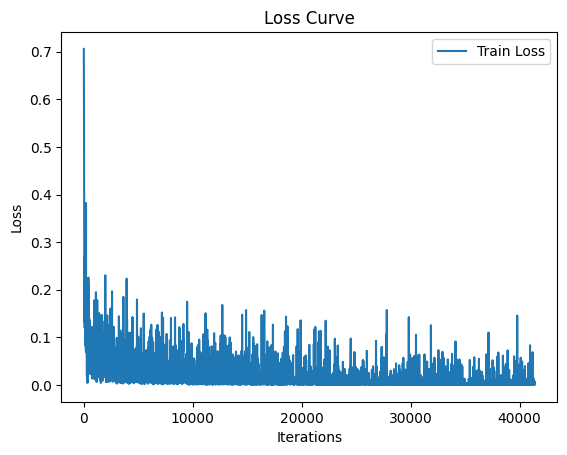

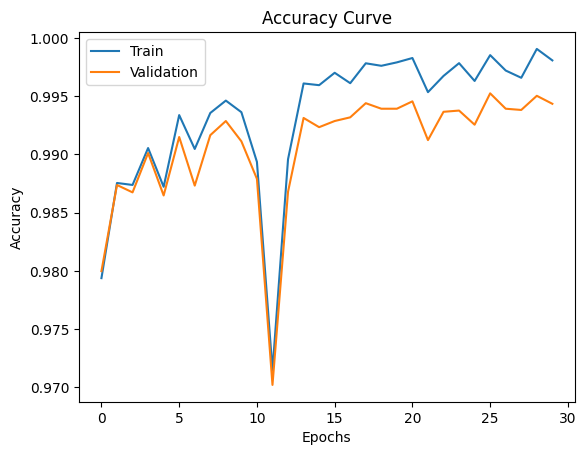

Final Training Accuracy: 0.9981
Final Validation Accuracy: 0.9943


In [ ]:
#Start training

use_cuda = True

model = MLP()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_dataset, val_dataset, batch_size=64, num_epochs=30)
